# this is a test

## prep

In [2]:
from urllib.request import urlopen
from urllib.parse import quote_plus
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


print(f"{bcolors.OKGREEN}hello{bcolors.ENDC}")

hello


## getting the data

In [4]:
class RevisionViewer():
    def __init__(self, lang='en', article='Earth', pages_back_cap=None):
      self.lang = lang
      self.article=article
      self.url_core = f'https://api.wikimedia.org/core/v1/wikipedia/{lang}'
      self.revisions = []
      self.pages_back_cap = pages_back_cap
      self.loaded = False # not used

    def __get_response_dict(self, url: str) -> dict:
        response = urlopen(url)
        response_json = json.load(response)
        return response_json

    def __get_page_history_url(self):
        return self.url_core + f'/page/{quote_plus(self.article.replace(" ", "_"), "ascii")}/history'
    
    def __get_revision_url(self, fromId: str, toId: str):
        return self.url_core + f'/revision/{fromId}/compare/{toId}'
    
    def __load_revisions(self):
        url_next = self.__get_page_history_url()
        index = 1

        while url_next and ((index <= self.pages_back_cap) if self.pages_back_cap else True):
            print(f"Getting revisions: page {index} / {self.pages_back_cap or '??'} from {url_next}")
            revision_dict = self.__get_response_dict(url_next)
            print(revision_dict)
            self.revisions.extend(revision_dict['revisions'])
            url_next = revision_dict.get('older', False)
            index = index + 1

        self.loaded = True

        return self.revisions
    
    def load_if_needed(self):
        if not self.loaded:
            self.__load_revisions()

        
    def get_df(self):
        self.load_if_needed()
        df = pd.DataFrame(self.revisions)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.rename(columns={'timestamp': 'datetime'})
        return df
    
    def __get_previous_rev_id(rev_id: str):
        pass

    def get_revision_diff(self, rev_a_id: str, rev_b_id: str):
        
        url = self.__get_revision_url(rev_a_id, rev_b_id)
        response_dict = self.__get_response_dict(url)
        return response_dict




In [22]:
krym_name = 'Półwysep Krymski'

krym_viewer = RevisionViewer('pl', krym_name)
krym_df = krym_viewer.get_df()


Getting revisions: page 1 / ?? from https://api.wikimedia.org/core/v1/wikipedia/pl/page/P%C3%B3%C5%82wysep_Krymski/history
{'revisions': [{'id': 74854269, 'timestamp': '2024-09-29T09:12:09Z', 'minor': True, 'size': 61600, 'comment': 'Wycofano edycję użytkownika [[Special:Contributions/188.146.122.173|188.146.122.173]] ([[User talk:188.146.122.173|dyskusja]]). Autor przywróconej wersji to [[User:Masti|Masti]].', 'user': {'id': 94020, 'name': 'Hektor Absurdus'}, 'delta': 85}, {'id': 74853461, 'timestamp': '2024-09-29T05:02:08Z', 'minor': False, 'size': 61515, 'comment': 'Przynależność', 'user': {'id': None, 'name': '188.146.122.173'}, 'delta': -85}, {'id': 74794579, 'timestamp': '2024-09-19T17:51:11Z', 'minor': True, 'size': 61600, 'comment': 'Wycofano edycję użytkownika [[Special:Contributions/37.109.11.90|37.109.11.90]] ([[User talk:37.109.11.90|dyskusja]]). Autor przywróconej wersji to [[User:Gootector|Gootector]].', 'user': {'id': 77940, 'name': 'Masti'}, 'delta': 85}, {'id': 7479457

In [23]:
krym_df

,id,datetime,minor,size,comment,user,delta
0,74854269,2024-09-29 09:12:09+00:00,True,61600,Wycofano edycję użytkownika [[Special:Contribu...,"{'id': 94020, 'name': 'Hektor Absurdus'}",85.0
1,74853461,2024-09-29 05:02:08+00:00,False,61515,Przynależność,"{'id': None, 'name': '188.146.122.173'}",-85.0
2,74794579,2024-09-19 17:51:11+00:00,True,61600,Wycofano edycję użytkownika [[Special:Contribu...,"{'id': 77940, 'name': 'Masti'}",85.0
3,74794573,2024-09-19 17:50:57+00:00,False,61515,,"{'id': None, 'name': '37.109.11.90'}",-85.0
4,73120811,2024-03-13 21:54:44+00:00,False,61600,/* Przynależność polityczno-administracyjna */...,"{'id': 624997, 'name': 'Gootector'}",2.0
...,...,...,...,...,...,...,...
1069,88963,2003-11-21 11:55:48+00:00,False,3962,ooops,"{'id': 573, 'name': 'Dixi'}",12.0
1070,88962,2003-11-21 11:53:54+00:00,False,3950,hasło,"{'id': 573, 'name': 'Dixi'}",3742.0
1071,88960,2003-08-04 17:58:11+00:00,False,208,,"{'id': 226, 'name': 'Silthor'}",4.0
1072,67914,2003-08-04 13:59:08+00:00,True,204,"wikizacja, zalążkizacja","{'id': 15, 'name': 'AdSR'}",140.0


In [5]:
titles = ['Stosunki polsko-ukraińskie', 'Rzeź wołyńska', 'Małopolska Wschodnia', 'Galicja Wschodnia']
dfs =[]

for title in titles:
  title_viewer = RevisionViewer('pl', title)
  a_df = title_viewer.get_df()
  dfs.append(a_df)
dfs

Getting revisions: page 1 / ?? from https://api.wikimedia.org/core/v1/wikipedia/pl/page/Stosunki_polsko-ukrai%C5%84skie/history
{'revisions': [{'id': 75192733, 'timestamp': '2024-11-09T18:43:51Z', 'minor': False, 'size': 38452, 'comment': '/* Po 2022 */', 'user': {'id': 1178196, 'name': 'Kronikarz dyplomacji'}, 'delta': 3}, {'id': 75192627, 'timestamp': '2024-11-09T18:27:19Z', 'minor': False, 'size': 38449, 'comment': 'drobne redakcyjne, drobne techniczne, ilustracja', 'user': {'id': 1178196, 'name': 'Kronikarz dyplomacji'}, 'delta': -336}, {'id': 74629648, 'timestamp': '2024-08-27T18:42:47Z', 'minor': False, 'size': 38785, 'comment': '/* Współpraca wojskowa */ ilustracja', 'user': {'id': 1178196, 'name': 'Kronikarz dyplomacji'}, 'delta': 289}, {'id': 74536031, 'timestamp': '2024-08-13T16:25:14Z', 'minor': True, 'size': 38496, 'comment': '/* Współpraca gospodarcza */ drobne merytoryczne, źródła/przypisy', 'user': {'id': 66882, 'name': 'TR'}, 'delta': 505}, {'id': 74524840, 'timestamp':

[           id                  datetime  minor   size  \
 0    75192733 2024-11-09 18:43:51+00:00  False  38452   
 1    75192627 2024-11-09 18:27:19+00:00  False  38449   
 2    74629648 2024-08-27 18:42:47+00:00  False  38785   
 3    74536031 2024-08-13 16:25:14+00:00   True  38496   
 4    74524840 2024-08-11 18:28:08+00:00  False  37991   
 ..        ...                       ...    ...    ...   
 191  57999496 2019-11-19 21:16:27+00:00  False   4110   
 192  57999399 2019-11-19 21:02:55+00:00  False   4085   
 193  57997894 2019-11-19 17:13:02+00:00  False   4042   
 194  57997772 2019-11-19 16:57:03+00:00  False   3971   
 195  57997673 2019-11-19 16:42:12+00:00  False   3502   
 
                                                comment  \
 0                                        /* Po 2022 */   
 1     drobne redakcyjne, drobne techniczne, ilustracja   
 2                 /* Współpraca wojskowa */ ilustracja   
 3    /* Współpraca gospodarcza */ drobne merytorycz...   
 4     

## saving the data to `.csv` files and loading it from there

In [9]:
krym_df.to_csv('../data/krym_revs.csv', index=False)

NameError: name 'krym_df' is not defined

In [17]:
loaded = pd.read_csv('../data/krym_revs.csv')
loaded["datetime"] = pd.to_datetime(loaded["datetime"])

In [12]:
for i, a_df in enumerate(dfs):
  a_df.to_csv(f'../data/{titles[i].replace(" ", "_")}.csv', index=False)

In [54]:
index = 2
print(titles[index])
reverts = dfs[index][dfs[index]["comment"].str.lower().str.contains("wycofano") | dfs[index]["comment"].str.lower().str.contains("anulowanie")]
print(f"Revert percent: {len(reverts) / len(dfs[index])}")
reverts

Małopolska Wschodnia
Revert percent: 0.050724637681159424


,id,datetime,minor,size,comment,user,delta
2,72523163,2024-01-16 07:30:46+00:00,False,30590,Wycofano ostatnią zmianę treści (wprowadzoną p...,"{'id': 300759, 'name': 'W2k2'}",-49.0
6,71670156,2023-11-01 19:14:18+00:00,False,30330,Anulowanie wersji [[Special:Diff/71669922|7166...,"{'id': 63206, 'name': 'Andros64'}",-43.0
9,70606285,2023-06-15 08:12:58+00:00,False,30244,Anulowanie wersji [[Special:Diff/70600103|7060...,"{'id': 63206, 'name': 'Andros64'}",-43.0
11,70517628,2023-06-02 19:35:34+00:00,True,30244,Anulowanie wersji [[Special:Diff/70517387|7051...,"{'id': 63206, 'name': 'Andros64'}",-43.0
19,70032156,2023-04-03 14:27:26+00:00,True,30244,Anulowanie wersji 70031332 autorstwa [[Special...,"{'id': 63206, 'name': 'Andros64'}",2.0
21,70030026,2023-04-03 09:55:19+00:00,False,30244,Anulowanie wersji 70028894 autorstwa [[Special...,"{'id': 63206, 'name': 'Andros64'}",-41.0
23,70009093,2023-03-31 12:59:23+00:00,False,30244,Anulowanie wersji 70007515 autorstwa [[Special...,"{'id': 63206, 'name': 'Andros64'}",-46.0
39,65212960,2021-11-09 17:11:59+00:00,False,29336,Anulowanie wersji 65116097 autorstwa [[Special...,"{'id': 13668, 'name': 'Mix321'}",203.0
46,60987417,2020-10-03 17:23:44+00:00,True,27792,Anulowanie wersji 60987310 autorstwa [[Special...,"{'id': 63206, 'name': 'Andros64'}",12.0
52,55662454,2019-01-22 14:32:26+00:00,True,25859,Anulowanie wersji 55662038 autorstwa [[Special...,"{'id': 63206, 'name': 'Andros64'}",-7.0


## plotting the data

In [ ]:
def plot_revision_freq(data: pd.DataFrame, article_name: str):
  daily_counts = data.groupby(data['datetime'].dt.date)['id'].count()

  start_date = daily_counts.index[0]
  end_date = daily_counts.index[len(daily_counts)-1]

  daily_dates = pd.date_range(start=start_date, end=end_date)

  daily_freq = pd.DataFrame(index=daily_dates)
  daily_freq['number_of_edits'] = daily_counts.fillna(0)
  daily_freq['number_of_edits'] = daily_freq['number_of_edits'].fillna(0)

  daily_freq['number_of_reverts'] = data["comment"]

  plt.figure(figsize=(10,6))
  plt.plot(daily_freq.index, daily_freq['number_of_edits'])
  plt.xlabel('Time')
  plt.ylabel('number of edits')
  plt.title(f'number of edits {article_name}')
  plt.show()


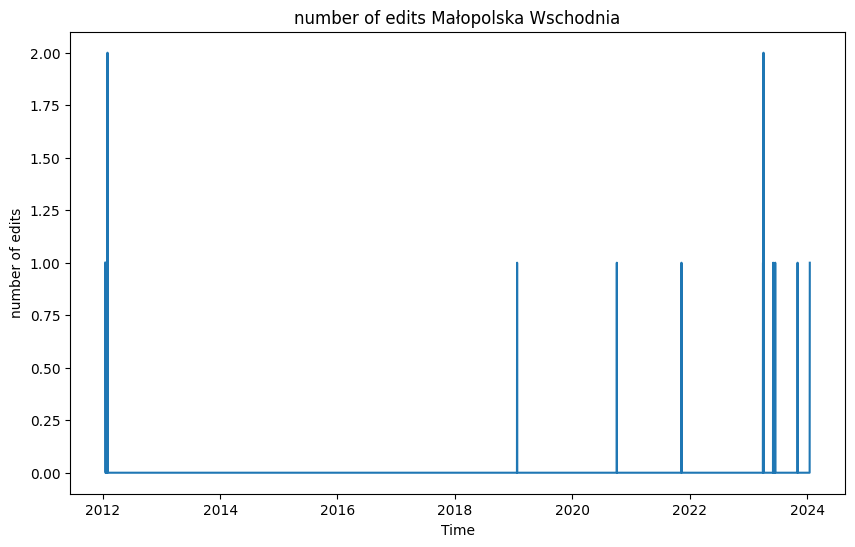

In [55]:
plot_revision_freq(reverts, titles[index])

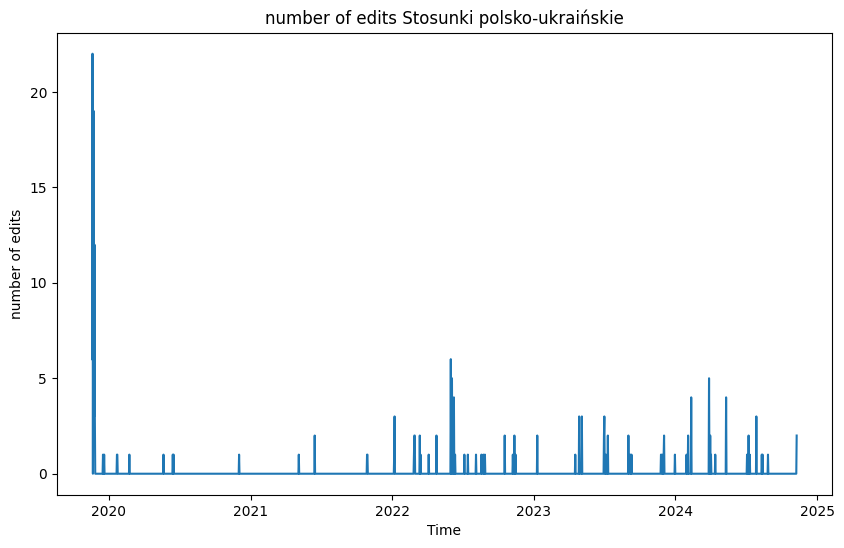

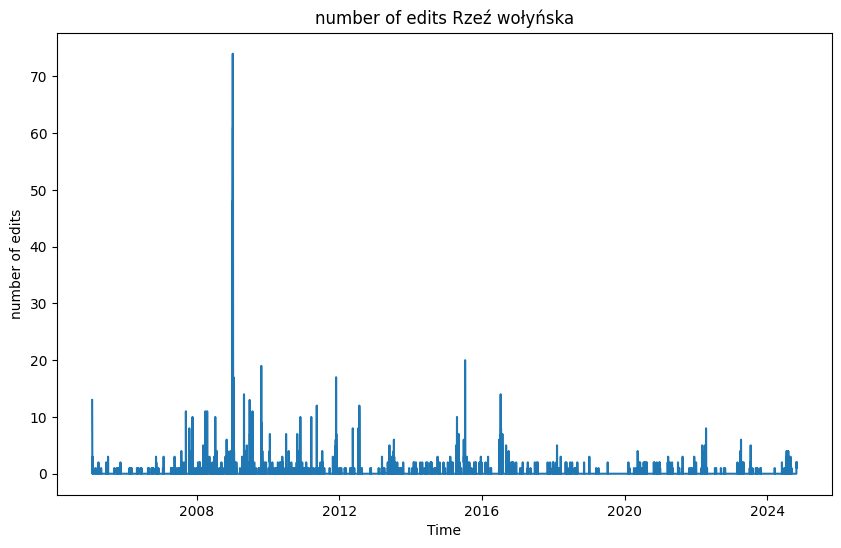

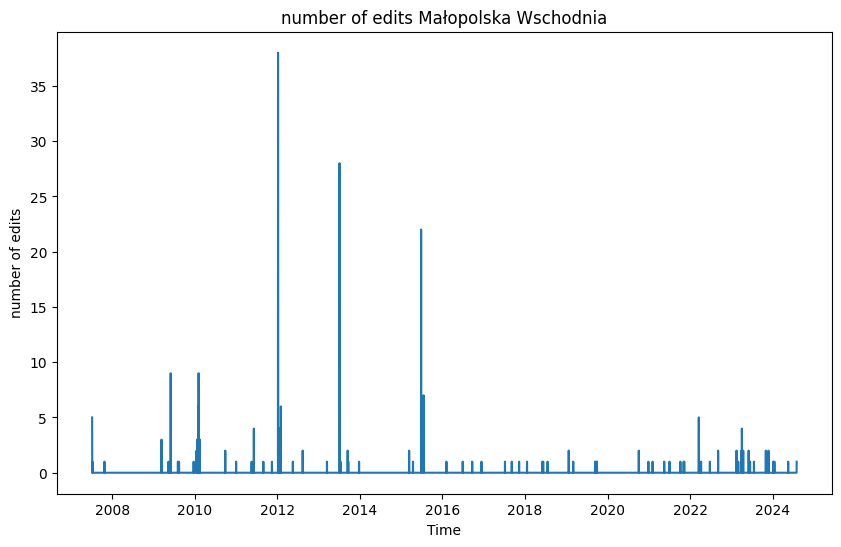

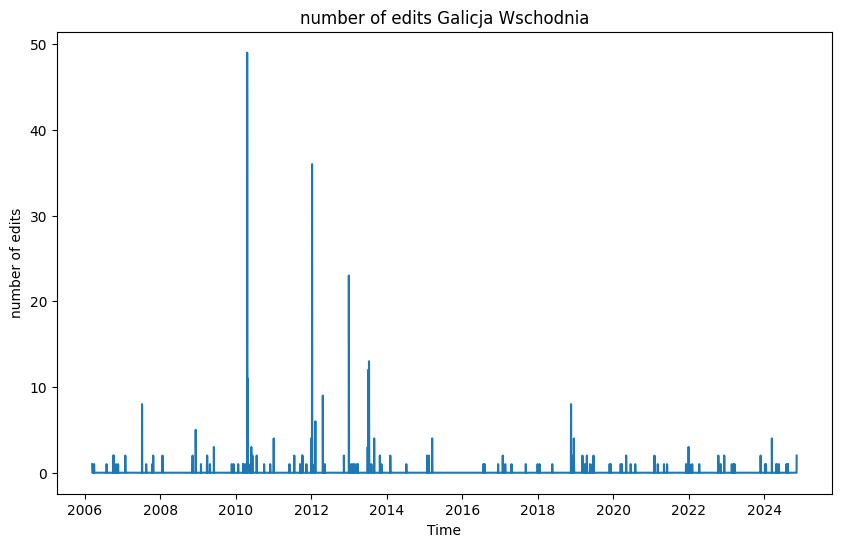

In [15]:
for i, a_df in enumerate(dfs):
  plot_revision_freq(a_df, titles[i])

In [195]:
def get_revisioned_article_content(rev_id, lang='pl'):
  url = f'https://api.wikimedia.org/core/v1/wikipedia/{lang}/revision/{rev_id}'
  response = urlopen(url)
  response_json = json.load(response)
  return response_json

In [228]:
print(get_revisioned_article_content(74853461))

{'id': 74853461, 'size': 61515, 'minor': False, 'timestamp': '2024-09-29T05:02:08Z', 'content_model': 'wikitext', 'page': {'id': 21682, 'key': 'Półwysep_Krymski', 'title': 'Półwysep Krymski'}, 'license': {'url': 'https://creativecommons.org/licenses/by-sa/4.0/deed.pl', 'title': 'Creative Commons Attribution-Share Alike 4.0'}, 'user': {'id': None, 'name': '188.146.122.173'}, 'comment': 'Przynależność', 'delta': -85, 'source': '{{Inne znaczenia|Krymu jako półwyspu|[[Krym|inne znaczenia słowa „Krym”]]}}\n{{Obiekt geograficzny infobox\n |nazwa         = Półwysep Krymski\n |inne nazwy    = Krym\n |grafika       = Satellite picture of Crimea, Terra-MODIS, 05-16-2015.jpg\n |opis grafiki  = Zdjęcie satelitarne półwyspu (2015)\n |państwo       = Krym\n |powierzchnia  = 27 tys. km²\n |miejscowości  = [[Sewastopol]], [[Symferopol]], [[Eupatoria]], [[Jałta]], [[Kercz]], [[Teodozja (miasto)|Teodozja]]\n |wysokość      = [[Roman-Kosz]], 1545\n |wydarzenia    = [[Wojna krymska]], [[Konferencja jałtań

In [197]:
def get_revision_diff(df: pd.DataFrame, to_rev_id: str, lang='pl'):
  """WE ARE ASSUMING THEY COME IN IN newer -> older ORDER, so the prev_id is actually a row up"""

  # get the id of the previous revision so we can compare
  mask = df['id'] == to_rev_id
  rev_index = df.loc[mask].index.min()
  from_rev_id = df.loc[rev_index + 1]["id"] # because the older come after

  print(from_rev_id)
  

  # compare
  url = f'https://api.wikimedia.org/core/v1/wikipedia/{lang}/revision/{from_rev_id}/compare/{to_rev_id}'
  print(url)
  response = urlopen(url)
  return json.load(response)
  

In [220]:
def parse_diff(diff):
  """The type of change represented by the diff object, either:

    0: A line with the same content in both revisions, included to provide context when viewing the diff. The API returns up to two context lines around each change.
    1: A line included in the to revision but not in the from revision.
    2: A line included in the from revision but not in the to revision.
    3: A line containing text that differs between the two revisions. (For changes to paragraph location as well as content, see type 5.)
    4: When a paragraph's location differs between the two revisions, a type 4 object represents the location in the from revision.
    5: When a paragraph's location differs between the two revisions, a type 5 object represents the location in the to revision. This type can also include word-level differences between the two revisions."""
  
  lines = []

  class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


  for d in diff:
    line = d['text']
    padding = ''.rjust(5, ' ')
    line_color = ''
    if (d["type"] != 0):
      padding = '>>'.rjust(5, ' ')
      if (d["type"] ==1):
        # addition
        line_color=bcolors.OKGREEN
      if (d["type"] == 2):
        # deletion
        line_color = bcolors.FAIL
      if d["highlightRanges"]:

        for range_obj in d["highlightRanges"]:

          start = range_obj["start"]
          length = range_obj["length"]
          string_color = bcolors.OKGREEN if range_obj["type"] == 0 else bcolors.FAIL
          line = f"{line[0:start]}{string_color}{line[start:start+length-1]}{bcolors.ENDC}{line[start+length-1:]}"
      # else:
        # move
        # 4 - paragraph moved, position in from
        # 5 - paragraph moved, position in to, possible word change
        # color_start = bcolors.WARNING
    print(f"{padding}{line_color}{line}{bcolors.ENDC}")

In [229]:
details = get_revision_diff(krym_df, 74853461)
print(details["diff"])

74794579
https://api.wikimedia.org/core/v1/wikipedia/pl/revision/74794579/compare/74853461
[{'type': 0, 'lineNumber': 20, 'text': "'''Półwysep Krymski''', '''Krym''' ({{ukr.|Кримський півострів}}, ''Krymśkyj piwostriw''; {{K|uk|Крим}}; {{ros.|Крымский полуостров}}, ''Krymskij połuostrow''; {{k|ru|Крым}}; {{w języku|crh|{{k|crh|Къырым ярымадасы|kursywa=nie}}}}, {{K|crh|Qırım yarımadası|kursywa=tak}}; {{k|crh|Къырым|kursywa=nie}}, {{k|crh|Qırım|kursywa=tak}}) – [[półwysep]] pomiędzy częścią północną [[Morze Czarne|Morza Czarnego]] a częścią zachodnią [[Morze Azowskie|Morza Azowskiego]], zwany w starożytności [[Chersonez Taurydzki|Chersonezem Taurydzkim]] bądź Taurydą, połączony jest z lądem tylko wąskim [[Przesmyk Perekopski|Przesmykiem Perekopskim]], pomiędzy morzami [[Morze Czarne|Czarnym]] i [[Morze Azowskie|Azowskim]], a na wschodzie oddzielony od lądu [[Cieśnina Kerczeńska|Cieśniną Kerczeńską]]. Powierzchnia ok. 27 tys. km².", 'offset': {'from': 819, 'to': 819}}, {'type': 0, 'lineNu

In [230]:
parse_diff(details["diff"])

     '''Półwysep Krymski''', '''Krym''' ({{ukr.|Кримський півострів}}, ''Krymśkyj piwostriw''; {{K|uk|Крим}}; {{ros.|Крымский полуостров}}, ''Krymskij połuostrow''; {{k|ru|Крым}}; {{w języku|crh|{{k|crh|Къырым ярымадасы|kursywa=nie}}}}, {{K|crh|Qırım yarımadası|kursywa=tak}}; {{k|crh|Къырым|kursywa=nie}}, {{k|crh|Qırım|kursywa=tak}}) – [[półwysep]] pomiędzy częścią północną [[Morze Czarne|Morza Czarnego]] a częścią zachodnią [[Morze Azowskie|Morza Azowskiego]], zwany w starożytności [[Chersonez Taurydzki|Chersonezem Taurydzkim]] bądź Taurydą, połączony jest z lądem tylko wąskim [[Przesmyk Perekopski|Przesmykiem Perekopskim]], pomiędzy morzami [[Morze Czarne|Czarnym]] i [[Morze Azowskie|Azowskim]], a na wschodzie oddzielony od lądu [[Cieśnina Kerczeńska|Cieśniną Kerczeńską]]. Powierzchnia ok. 27 tys. km².
     
   >>Krym ''[[de iure]]'' należy do [[Ukraina|Ukrainy]], ''[[de facto]]'' zaś w 2014 r. [[Rada Najwyższa Republiki Autonomicznej Krymu]] ogłosiła deklarację niepodległości [[Auto

In [ ]:
74794579